# Exercise 3: Binary search tree

In [104]:
# Implement the binary search tree class
class Tree:
    def __init__(self, value = None, data = None): # Provide default parameters, or else Python will scream
        self._value = value # patient_id; sort by this
        self._data = data # Additional patient information
        self.left = None
        self.right = None

    # Insert a value and associated data into the tree
    def add(self, value, data):
        # Check if root is empty
        if self._value is None:
            self._value = value # Add patient_id to empty node
            self._data = data # Add data to empty node
        # Check if intended value is smaller than root
        elif value < self._value:
            if self.left is None:
                self.left = Tree() # Create new left child node
            self.left.add(value, data) # Insert value in left child node
        # Check if intended value is larger than root
        elif value > self._value:
            if self.right is None:
                self.right = Tree() # Create new right child node
            self.right.add(value, data) # Insert value in right child node
        else:
            self._data = data # Update data in existing node

    # Recursive method asking if tree or sub-tree contains a value        
    def __contains__(self, patient_id):
        if self._value == patient_id:
            return True
        elif self.left and patient_id < self._value:
            return patient_id in self.left
        elif self.right and patient_id > self._value:
            return patient_id in self.right
        else:
            return False

In [105]:
# Test the class
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

print(24601 in my_tree) # True
print(1492 in my_tree)  # False

True
False


In [106]:
# Check if a given tree has a given piece of patient data
def has_data(tree, data):
    # If the current node is empty, then the data is not there (wow, what a concept!)
    if tree is None:
        return False
    
    # If the current node has the data, then the data is there (oh my god!)
    if tree._data == data:
        return True
    
    # Recursively check if the left sub-tree or right sub-tree has the data
    return has_data(tree.left, data) or has_data(tree.right, data)

# Test the function
print(has_data(my_tree, "JV"))  # True
print(has_data(my_tree, 24601)) # False

True
False


In [107]:
# Stress-test performance for __contains__() and has_data()
import random
import time

tree_sizes = [10, 50, 100, 500, 1000, 5000, 10000] # Various sizes n of trees to be tested
contains_times = [] # __contains__() performance times per n-sized tree
has_data_times = [] # has_data() performance times per n-sized tree

for tree_size in tree_sizes:
    # Generate a list of tuples: (random_patient_ids, random_data) where data is randomized by tree size
    patient_data = set() # Sample data from set rather than pulling from list to reduce sorting/tree unbalancing
    while len(patient_data) < tree_size:
        patient_data.add((random.randint(1, tree_size * 10), f"Data_{random.randint(1, tree_size)}"))
    patient_data = list(patient_data)

    # Create a tree and populate it with n random_patient_ids and random_data
    tree = Tree()
    for patient_id, data in patient_data:
        tree.add(patient_id, data)

    # Test performance of __contains__()
    nums_to_check = random.sample([id for id, _ in patient_data], tree_size)
    start_time = time.perf_counter()
    for num in nums_to_check:
        num in tree # Check if a random number is in the tree
    end_time = time.perf_counter()
    contains_times.append((end_time - start_time) / len(nums_to_check))

    # Test performance of has_data()
    data_to_check = random.sample([data for _, data in patient_data], tree_size)
    start_time = time.perf_counter()
    for data in data_to_check:
        has_data(tree, data) # Check if a random data point is in the tree
    end_time = time.perf_counter()
    has_data_times.append((end_time - start_time) / len(data_to_check))     

Text(0, 0.5, 'log(time)')

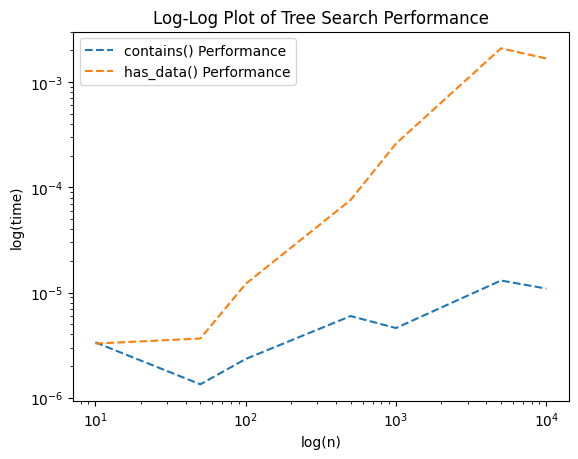

In [108]:
# Plot performance for __contains__() and has_data()
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Suppress seaborn's warnings

plot = sns.lineplot(x = tree_sizes, y = contains_times, label = "contains() Performance", linestyle = "--")
sns.lineplot(x = tree_sizes, y = has_data_times, label = "has_data() Performance", linestyle = "--", ax = plot)
plot.set(xscale = "log", yscale = "log")
plot.set_title("Log-Log Plot of Tree Search Performance")
plot.set_xlabel("log(n)")
plot.set_ylabel("log(time)")

**Plot Discussion:** The `__contains__()` method appears to perform consistently faster than `has_data()`, which is expected. `__contains__()` does appear to flatten on a log-log scale at larger tree sizes. In comparison, overhead for `has_data()` seems to grow at a much faster rate, which makes it slower than $O(n)$ at least. There are caveats - the noise and sawtooth pattern in the plots can come from the fact that I am not running multiple experiments of each tree size and averaging the times, as well as the taxed system environment in which I am running the code (I am unable to run larger tree sizes as it takes an annoyingly intractable amount of time on my computer).

In [109]:
# Analyze time complexity for tree instantiation
tree_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
setup_times = []

for tree_size in tree_sizes:
    patient_ids = [(random.randint(1, tree_size * 10)) for i in range(tree_size)]
    tree = Tree()

    start_time = time.perf_counter()
    for patient_id in patient_ids:
       tree.add(patient_id, f"Data_{patient_id}")
    end_time = time.perf_counter()
    
    setup_times.append(end_time - start_time)

Text(0.5, 1.0, 'Time Complexity Plot of Tree Instantiation Performance')

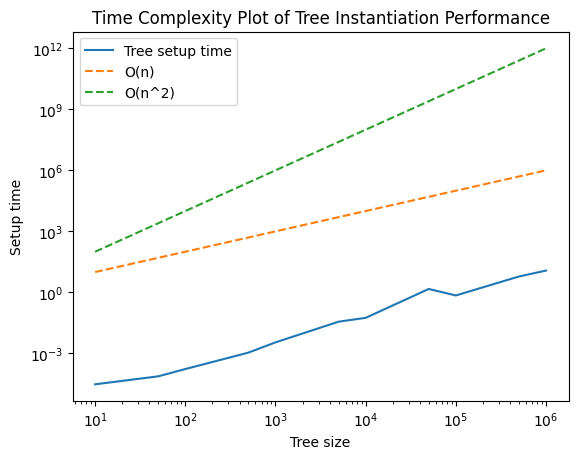

In [110]:
# Plot time complexity for tree instantiation
plot = sns.lineplot(x = tree_sizes, y = setup_times, label = "Tree setup time")
sns.lineplot(x = tree_sizes, y = [tree_size for tree_size in tree_sizes], label = "O(n)", linestyle = "--", ax = plot)
sns.lineplot(x = tree_sizes, y = [tree_size**2 for tree_size in tree_sizes], label = "O(n^2)", linestyle = "--", ax = plot)
plot.set(xscale = "log", yscale = "log")
plot.set_xlabel("Tree size")
plot.set_ylabel("Setup time")
plot.set_title("Time Complexity Plot of Tree Instantiation Performance")

**Plot Discussion:** The tree setup performance appears to be faster than $O(n)$, which is unexpected and could be attributed to differences in system environment and overhead. It is at least faster than $O(n^2)$, which is expected, as it should be relatively close to $O(nlogn)$. This should be between the $O(n)$ line and $O(n^2)$ line.

Please note that, as mentioned before there are caveats with my stress-tests. My computer is relatively old (MacBook Air 2017, with Intel processor, 8 GB RAM). The results of high-cost stress-tests on this machine and plots generated from them may not be representative. I also tend to have other high-cost software open, like Google Chrome, which may cause Visual Studio Code to start using disk swap - this may inflate the runtime.

**Test Data Discussion:** Always using `patientid = 1`, or a single test point, can be unrepresentative because of the way that binary search trees (BSTs) are constructed. Since we are testing different BST sizes, finding the same `patient_id` across different tree structures would not be representative of the average time it would take to locate a random `patient_id` and provide no information on variability of tree search times for different `patient_ids`. It would not be a fair stress-test of the tree search functions. In extreme cases, it may be at the root of the tree or buried deep inside it, which would bias the search time. The search time would also be biased if the BST happens to be unbalanced.